In [1]:
include("../src/JuliaMBD.jl")

Main.JuliaMBD

In [2]:
using DifferentialEquations
using Plots
using .JuliaMBD

In [3]:
## RLC

@model RLC begin
    @parameter begin
        R
        L
        C
    end

    @block begin
        int1 = Integrator()
        int2 = Integrator()
        in1 = Inport(:in)
        out1 = Outport(:out)
        gain1 = Gain(K = R)
        gain2 = Gain(K = 1/C)
        gain3 = Gain(K = 1/L)
        sum1 = Add(signs=[:+, :-, :-])
    end

    @connect begin
        in1.out => sum1.in1
        gain1.out => sum1.in2
        int1.out => sum1.in3
        sum1.out => gain3.in
        gain3.out => int2.in
        int2.out => out1.in
        int2.out => gain1.in
        int2.out => gain2.in
        gain2.out => int1.in
    end
end

RLC (generic function with 1 method)

In [4]:
## RLC test

@model Test begin
    @parameter begin
        R
        L
        C
        voltage
    end

    @block begin
        system = RLC(R=R, L=L, C=C)
        source = Step(steptime=0.1, finalvalue=voltage)
    end

    @connect begin
        source.out => system.in
    end

    @scope begin
        # source.out => v
        system.out => i
    end
end

Test (generic function with 1 method)

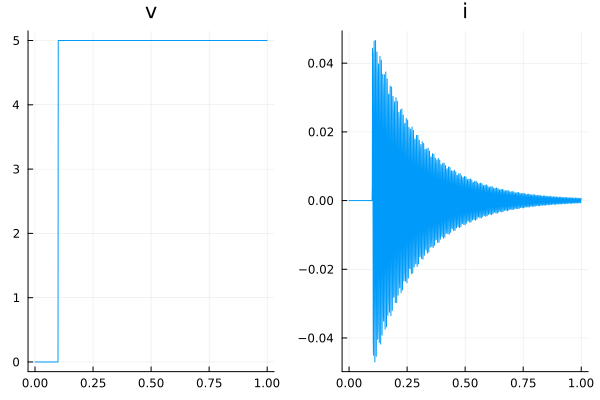

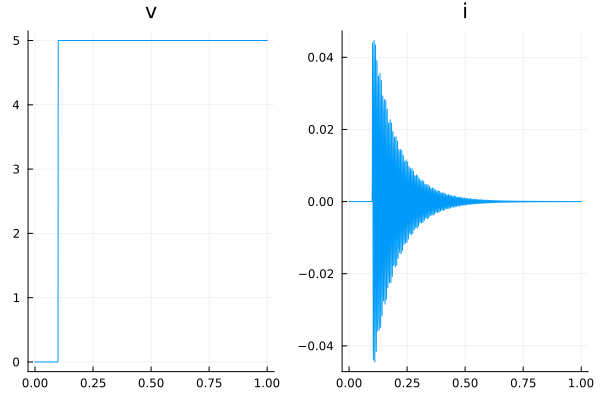

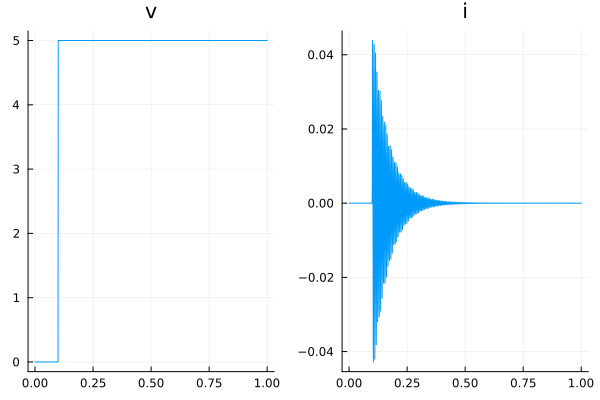

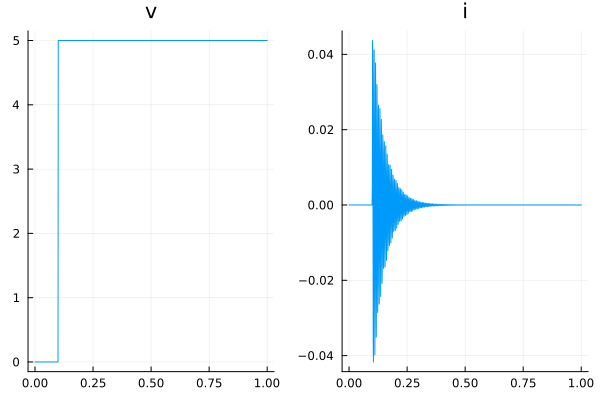

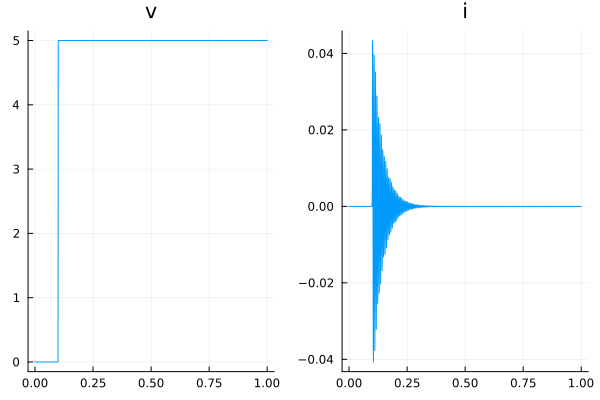

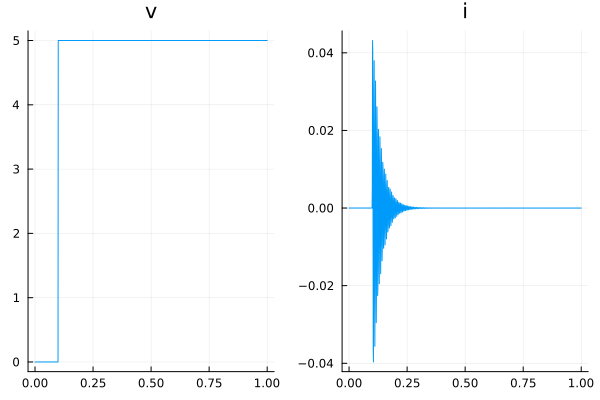

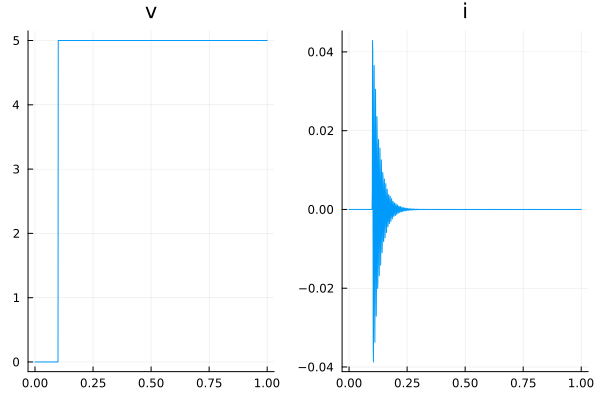

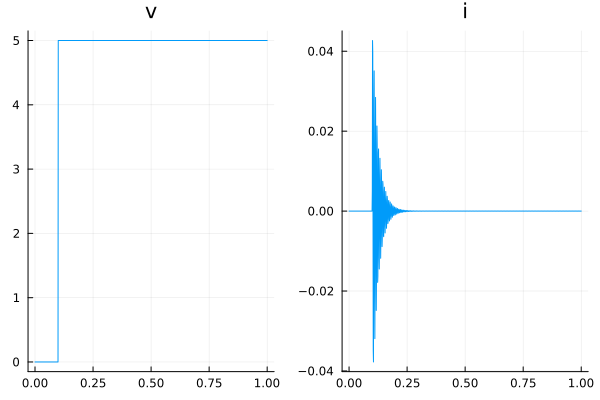

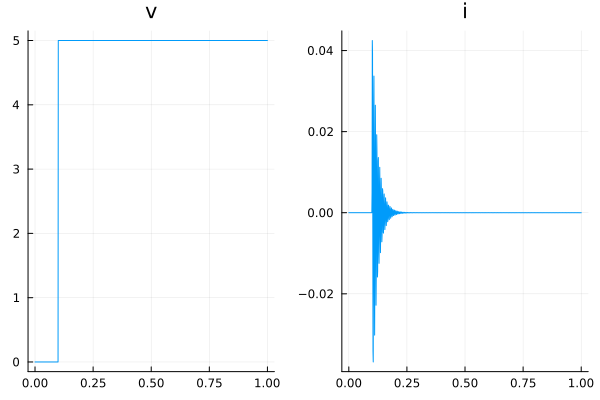

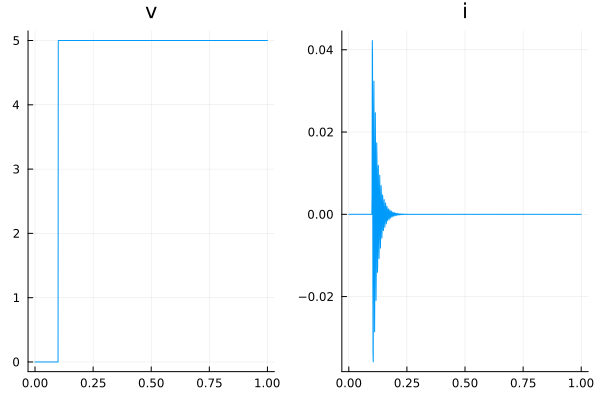

In [12]:
m = @compile Test(R=@v(10), L=100e-3, C=10e-6, voltage=5)
for R = 1:10
    result = JuliaMBD.simulate(m, tspan=(0,1), parameters=(R=R,), alg=DifferentialEquations.Tsit5());
    display(plot(result, layout=(1,2)))
end
